In [12]:
#%tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [1]:
#from IPython.display import display, Image
#from matplotlib.pyplot import imshow
#from keras.layers import Conv2D, UpSampling2D, InputLayer
#from keras.models import Sequential
#from keras.preprocessing.image import img_to_array, load_img
#from skimage.color import lab2rgb, rgb2lab
#import numpy as np
#import pandas as pd

Using TensorFlow backend.


In [13]:
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose, MaxPooling2D
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils.vis_utils import plot_model
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow
from matplotlib.pyplot import imshow
import matplotlib as plt
import matplotlib.image as mpimg


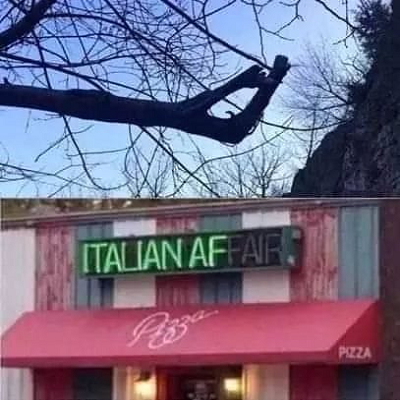

In [3]:

# Ładowanie zdjęć
image = load_img('/content/Italian_2.png')

#



image

In [9]:
image = img_to_array(image) / 255
NN_image = image = np.array(image, dtype=float)
NN_image = rgb2lab(image)
NN_image.shape

(400, 400, 3)

In [14]:
original=NN_image
grayscale=rgb2gray(NN_image)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

AttributeError: ignored

In [15]:
NN_image= (NN_image + [0, 128, 128]) / [100, 255, 255]

In [16]:
NN_image.shape

(400, 400, 3)

In [5]:
X = NN_image[:,:,0]

In [6]:
X.shape

(400, 400)

In [7]:
Y = NN_image[:,:,1:]

In [8]:
Y.shape

(400, 400, 2)

In [10]:
NN_image.shape

(400, 400, 3)

In [9]:
X = X.reshape(1, X.shape[0], X.shape[1], 1)
Y = Y.reshape(1, Y.shape[0], Y.shape[1], 2)

In [10]:
print(X.shape)

print(Y.shape)


(1, 400, 400, 1)
(1, 400, 400, 2)


TypeError: ignored

In [17]:
#model = Sequential()
#model.add(Conv2D(64, kernel_size=3, activation='relu' , input_shape=(407,433,1)))
#model.add(Conv2D(32, kernel_size=3, activation='relu'))
#model.add(Flatten())
#model.add(Dense(10, activation='softmax'))

In [18]:
#model = Sequential()
#model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#
#model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#
#model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#
#model.add(Activation("softmax"))

In [11]:
model = keras.models.Sequential([
keras.layers.InputLayer(input_shape=(None,None, 1)),
keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2),
keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2),
keras.layers.UpSampling2D((2, 2)),
keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
keras.layers.UpSampling2D((2, 2)),
keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
keras.layers.UpSampling2D((2, 2)),
keras.layers.Conv2D(2, (3,3), activation='tanh', padding='same')])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, None, None, 8)     80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 16)    1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 16)    2320      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 32)    4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 32)    9248      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, None, None, 32)    0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 32)    9

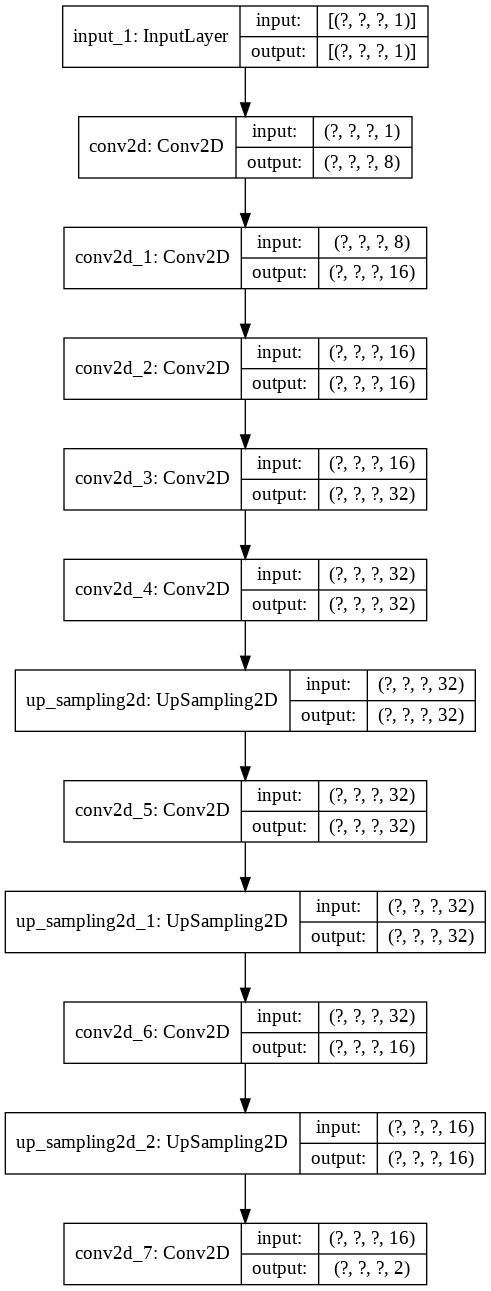

In [12]:
tensorflow.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [17]:


#model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
#model.fit(x=X, y=Y, batch_size=1, epochs=100)




Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 1.8744
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 1.6167
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 1.3737
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 1.3434
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 1.3425
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 1.3420
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 1.3416
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 1.3413
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 1.3410
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 1.3409
Epoch 11/100
1/1 [==============================] - 0s 1ms/step - loss: 1.3407
Epoch 12/100
1/1 [==============================] - 0s 1ms/step - loss: 1.3406
Epoch 13/100
1/1 [==============================] - 0s 1ms/st

In [13]:



model.compile(optimizer='rmsprop', loss='mse')



In [14]:
model.fit(x=X, y=Y, batch_size=1, epochs=500)


Epoch 1/500
1/1 [==============================] - 0s 2ms/step - loss: 0.2537
Epoch 2/500
1/1 [==============================] - 0s 1ms/step - loss: 0.1812
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0433
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0247
Epoch 5/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0600
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0921
Epoch 7/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0203
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0186
Epoch 9/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0186
Epoch 11/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0251
Epoch 12/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0380
Epoch 13/500
1/1 [==============================] - 0s 1ms/st

1/1 [==============================] - 0s 1ms/step - loss: 7.5943e-04


/usr/local/lib/python3.6/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 160000 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: img_result.png is a low contrast image
  # Remove the CWD from sys.path while we load stuff.


0.0007594302878715098


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: img_gray_version.png is a low contrast image
  # This is added back by InteractiveShellApp.init_path()


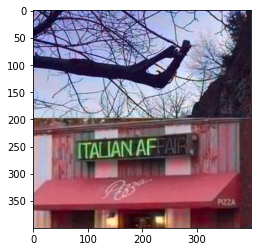

In [46]:
output = model.predict(X)

cur = np.zeros((400, 400, 3))
cur[:,:,0] = X[0][:,:,0]
cur[:,:,1:] = output[0]

cur = (cur * [100, 255, 255]) - [0, 128, 128]
rgb_image = lab2rgb(cur)
imshow(rgb_image)


In [19]:
#cur.shape
#rgb_grey = lab2rgb(rgb2gray(rgb_image))
#imshow(rgb_grey)
